# Démarrer avec les images

Dans ce cahier, nous allons examiner quelques techniques fondamentales pour travailler avec des images et des fichiers d'images. 
Nous utilisons quelques images qui sont adaptées de l'ensemble de données du PASCAL Visual Object Classes Challenge (VOC2007) sur http://host.robots.ox.ac.uk/pascal/VOC/voc2007/.

Commençons par visualiser certaines de ces images. Elles sont stockées dans une hiérarchie de dossiers qui contient un sous-dossier pour chaque type d'objet représenté dans l'image ; nous afficherons donc la première image dans chaque dossier.

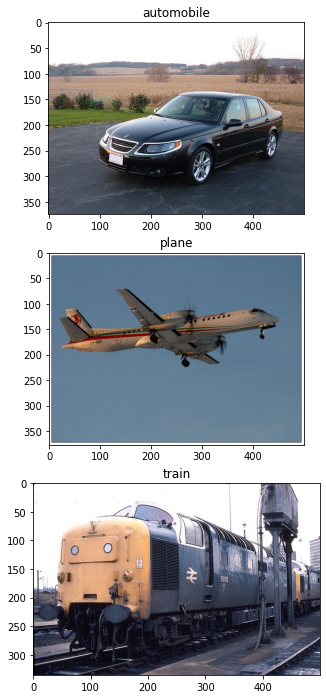

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mp_image
import os, os.path
# Required magic to display matplotlib plots in notebooks
%matplotlib inline
from sklearn.datasets import load_sample_image

src_folder = "../input/computer-vision-dataset/voc"

# Set up a figure of an appropriate size
fig = plt.figure(figsize=(12, 12))

# loop through the subfolders
for root, folders, filenames in os.walk(src_folder):
    image_num = 0
    num_folders = len(folders)
    for folder in sorted(folders):
        # Keep an incrementing count of each image
        image_num=image_num+1
        # Find the first image file in the folder
        file_name=os.listdir(os.path.join(root,folder))[0]      
        # Get the full path from the root folder (os.path.join)
        file_path=os.path.join(root,folder,file_name)
        # Open the file using the matplotlib.image library (imread)
        image=mp_image.imread(file_path)
        # Add the image to the figure (which will have a row for each folder, each containing one column for the image, add_subplot)
        a=fig.add_subplot(num_folders,1,image_num)
        # Add the image to the plot (imshow)
        image_plot=plt.imshow(image)
        # Add a caption with the folder name (set_title)
        a.set_title(folder)
        
# Show the plot
plt.show()

Utilisez pip pour installer pillow, opencv, et mettre à jour SciKit-Image à la dernière version.

Utilisez chacune de ces bibliothèques pour charger une image, puis utilisez matplotlib pour les afficher

In [8]:
from PIL import Image
import skimage as sk
from skimage import io as sk_io
import cv2

images = []
#load the image automobile 000522.jpg using Pillow and add it to images array
pil_image =Image.open(src_folder+"/automobile/000522.jpg")
images.append(pil_image)
#load the image plane 000228.jpg using scikit learn and add it to images array
sk_image = sk.io.imread(src_folder+"/plane/000228.jpg")
images.append(sk_image)
#load the image train 000712.jpg using openCv and add it to images array
cv_image = cv2.imread('voc/train/000712.jpg')
images.append(cv_image)
#print(cv_image.shape)
# Set up a figure of an appropriate size (figsize)
fig = plt.figure(figsize=(12, 12))



<Figure size 864x864 with 0 Axes>

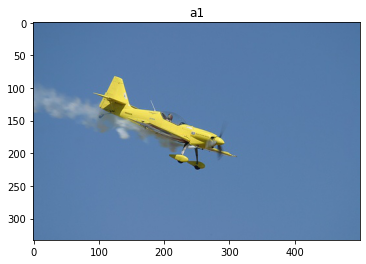

In [22]:
image_num = 0
num_images = len(images)
# loop through the images
for image_idx in range(2):
    # Keep an incrementing count of each image (add_subplot)
    image_num+=1
    fig.add_subplot(1,num_images,image_idx+1)
    # Add the image to the plot (imshow)
    plt.imshow(images[image_idx])
    # Add a caption with the folder name (set_title)
    plt.title("a"+str(image_idx))
        
# Show the plot
plt.show()

Les images sont des tableaux de valeurs de pixels, et dans le cas des images en couleur, elles sont composées de multiples dimensions, ou canaux. Dans une image JPEG, ces canaux représentent généralement les intensités de pixels pour le rouge, le vert et le bleu (RGB), mais par défaut, OpenCV les ordonne comme suit : bleu, vert, rouge (BGR). Nous pouvons corriger cela par quelques conversions.

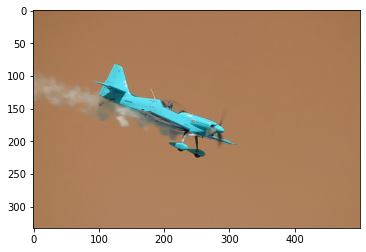

In [30]:
# convert cv_image from BGR to RGB (cvtColor) ()
cv_image_rgb = cv2.cvtColor(sk_image, cv2.COLOR_BGR2RGB)
# show the image (imshow)
plt.imshow(cv_image_rgb)

In [31]:
cv_image_rgb.shape

(333, 500, 3)

In [32]:
import pandas as pd
a= pd.DataFrame(cv_image_rgb.reshape(1,-1))

En Python, nous traitons généralement des tableaux de valeurs numériques en utilisant la bibliothèque [**Numpy**](https://docs.scipy.org/doc/numpy/).

Vérifions le type de données des images.

In [33]:
a.shape

(1, 499500)

In [34]:
# display the type of cv_image_rgb
print(type(cv_image_rgb))

# display the type of sk_image
print(type(sk_image))
# display the type of pil_image
print(type(pil_image))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'PIL.JpegImagePlugin.JpegImageFile'>


Les objets PIL ont leur propre type de données spécifiques à l'image. Cependant, il est facile de convertir une image PIL en un tableau Numpy

<class 'numpy.ndarray'>


PIL.JpegImagePlugin.JpegImageFile

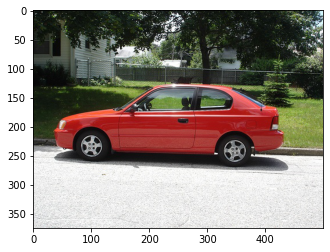

In [35]:
# convert pil_image to a Numpy array (np.array):
pil_array = np.array(pil_image)
print(type(pil_array))
# display the type of pil_array
plt.imshow(pil_array)
# show the pil_array 
type(pil_image)

Il est aussi possible inversement de convertir les images au format Numpy array en images PIL

<class 'PIL.Image.Image'>


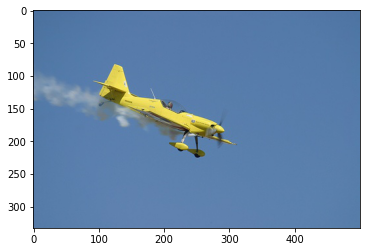

In [36]:
# convert sk_image in Numpy array format to PIL image (Image.fromarray)
pil_sk_image = Image.fromarray(sk_image)
# display the type of pil_sk_image
print(type(pil_sk_image))
# show the pil_sk_image (pil_array)
plt.imshow(pil_sk_image)

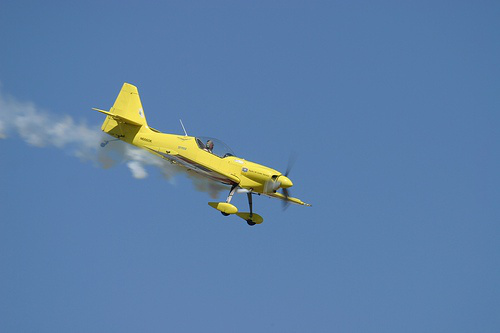

In [37]:
pil_sk_image

Il est également possible de convertir des images en couleur en niveaux de gris

(333, 500)

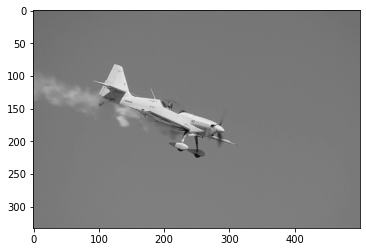

In [38]:
# convert sk_image to gray image (scikit rgb2gray)
sk_gray_image = sk.color.rgb2gray(sk_image)
# show sk_gray_image (imshow)
plt.imshow(sk_gray_image,'gray')
# display the dimensions of sk_image (shape)
sk_image.shape
# display the dimensions of sk_gray_image (shape, with parameter gray)
sk_gray_image.shape

Notez que la méthode `plt.imshow` nécessite un paramètre pour lui dire que cette image doit être affichée en niveaux de gris ; sinon elle essaiera de montrer une image à un seul canal en utilisant trois canaux !

## Manipules les Images

La LIP comprend une méthode de "rotate" que nous pouvons utiliser.
Le paramètre **expand** indique à PIL de modifier les dimenions de l'image pour qu'elle s'adapte à l'orientation de la rotation. Sans cela, nous obtiendrions une image aux dimensions d'origine avec une version redimensionnée et tournée de l'image et l'espace créé serait rempli.

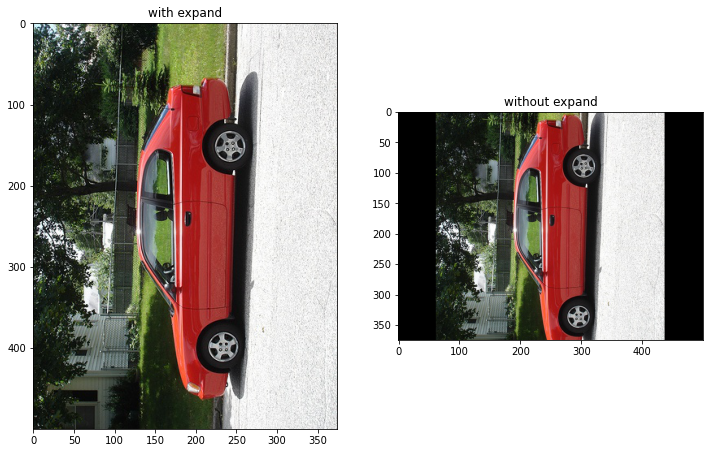

In [39]:
#rotate pil_image by 90° with or without changing its dimensions (use pil_image rotate, and the expand parameter)
from PIL import Image
import PIL
rotated_pil_image_expand = pil_image.rotate(90,  expand = 1)
rotated_pil_image_noExpand = pil_image.rotate(90,  expand = 0)

# Show the two images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for rotated_pil_image_expand (imshow)
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(rotated_pil_image_expand)
a.set_title('with expand')

# Subplot for  (imshow)
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(rotated_pil_image_noExpand)
a.set_title('without expand')

plt.show()

De plus, Scikit-image dispose d'une bibliothèque de transformations, dont une méthode de **rotate** qui se comporte de manière similaire aux LIP.

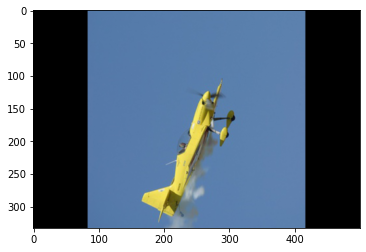

In [40]:
# import transform from scikit learn as sk_transform
from skimage import transform as sk_transform
#rotate sk_image by 90° with changing its dimensions (use sk_transform rotate, and the resize parameter)
rotated_sk_image = sk_transform.rotate(image=sk_image,angle=90)
# show rotated_sk_image (imshow)
plt.imshow(rotated_sk_image)

Comme un tableau Numpy, les images opencv peuvent être retournées en utilisant la méthode Numpy **flip**.

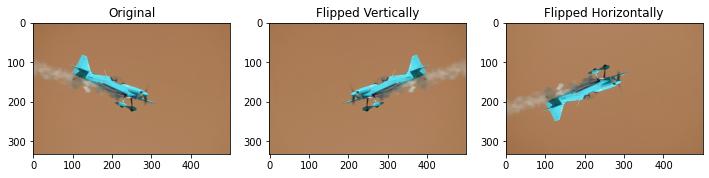

In [41]:
import numpy as np

# flip cv_image_rgb vertically
upended_cv_image_rgb = cv2.flip(cv_image_rgb, 1)

# flip cv_image_rgb horizontally 
mirrored_cv_image_rgb =  cv2.flip(cv_image_rgb, 0)

# Set up a figure of an appropriate size
fig = plt.figure(figsize=(12, 12))

# Plot original image
a=fig.add_subplot(1, 3, 1)
# show original image
image_plot_1 = plt.imshow(cv_image_rgb)
a.set_title("Original")

# Plot upended image
a=fig.add_subplot(1, 3, 2)
# show image flipped vertically
image_plot_2 = plt.imshow(upended_cv_image_rgb)
a.set_title("Flipped Vertically")

# Plot mirrored image
a=fig.add_subplot(1, 3, 3)
# show image flipped horizontally
image_plot_3 = plt.imshow(mirrored_cv_image_rgb)
a.set_title("Flipped Horizontally")

plt.show()

## Redimensionnement des images

Une façon de redimensionner les images est d'utiliser la méthode PIL **thumbnail**. Cette méthode effectue ce que nous appelons *re-scalage* de l'image. Même si nous spécifions la taille cible pour la hauteur et la largeur, l'image est redimensionnée de sorte que sa dimension la plus longue (la largeur dans l'exemple suivant) est définie comme la plus longue dimension de la taille cible, et l'autre dimension (la hauteur dans l'exemple suivant) est redimensionnée proportionnellement pour conserver le bon rapport hauteur/largeur.

Original size: 500 x 375
New size: 150 x 113


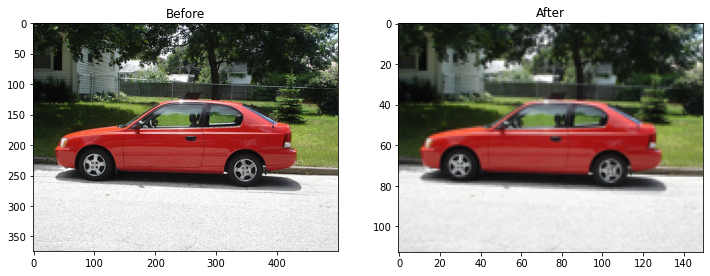

In [42]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline


# Get the pil_image size
o_h, o_w = pil_image.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 150 pixels on its widest dimensions
target_size = (150,150)
# use copy function to copy pil_image into resized_img
resized_img = pil_image.copy()
# perform image resizing of resized_img to target_size using thumbnail function and using ANTIALIAS parameter

  
resized_img.thumbnail(target_size)

n_h, n_w = resized_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(pil_image)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(resized_img)
a.set_title('After')

plt.show()


Nous pouvons utiliser la méthode de **resize** si nous voulons réellement produire une image de dimensions extactement égales à la taille souhaité. Le rapport hauteur/largeur de l'image ne sera toutefois pas respecté.

Original size: 500 x 375
New size: 150 x 150


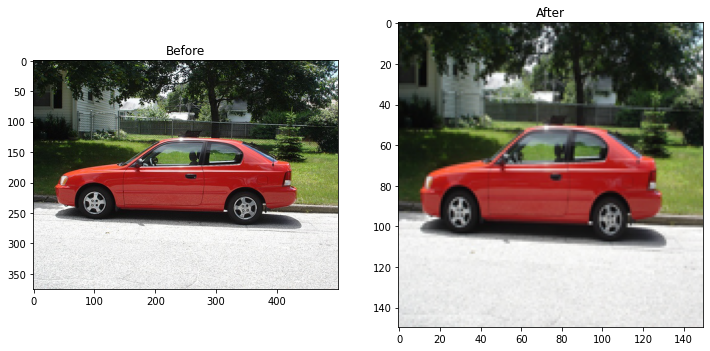

In [43]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline

# Get the pil_image size
o_h, o_w = pil_image.size
print('Original size:', o_h, 'x', o_w)

# Resize pil_image to 150 x 150 using PIL resize
target_size = (150,150)
new_img = pil_image.resize(target_size)
# get new_img size
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(pil_image)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(new_img)
a.set_title('After')

# plot show
plt.show()


Nous avons redimensionné l'image rectangulaire pour qu'elle ait des dimensions carrées, mais l'image a été déformée pour remplir la nouvelle taille.

Si nous voulons redimensionner l'image et changer sa forme sans la déformer, nous devons *réaliser* l'image de manière à ce que sa plus grande dimension corresponde à notre nouvelle taille souhaitée, et remplir tout espace supplémentaire avec une sorte de bordure.

Pour ce faire, nous pouvons utiliser la méthode **thumbnail** pour redimensionner l'image de manière à ce que sa plus grande dimension corresponde à la taille souhaitée; puis créer une nouvelle image de "background" (fond) de la bonne dimension, et ensuite *paste* (coller) la vignette thumbnail redimensionnée au milieu du fond. Nous allons encapsuler ceci dans la fonction suivante resize_image :

Original size: 500 x 375
New size: 150 x 113


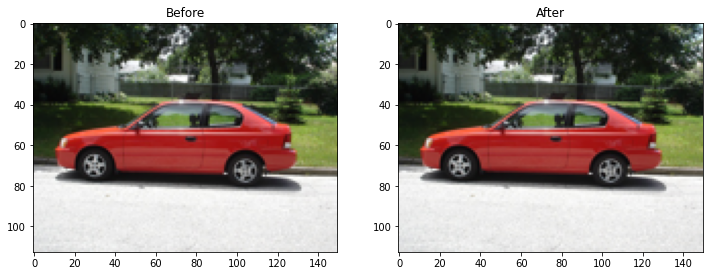

In [44]:
def resize_image(src_image, size=(200,200), bg_color="white"): 
    from PIL import Image, ImageOps 
    
    # resize the src_image so the longest dimension matches our target size (using thumbnail and ANTIALIAS)
    src_image.thumbnail(size)
    
    # Create a new square background image (using PIL Image.new(...), RGB and bg_color as a color for the background)
    new_image = PIL.Image.new(mode="RGB", size=size, color=bg_color)
    
    # Paste the resized image src_image into the center of the square background new_image (suing the PIL function paste)
    new_image = src_image.copy()
    new_image.paste(new_image, size)
  
    # return the resized image
    return new_image


# Get and print pil_image size
o_h, o_w = pil_image.size
print('Original size:', o_h, 'x', o_w)

# Resize pil_image so it's 150 x 150 with black padding
target_size = (150,150)
pad_color = 'black'
resized_img = resize_image(pil_image, size=target_size, bg_color=pad_color)

#  Get and print resized_image size
n_h, n_w = resized_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(pil_image)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(resized_img)
a.set_title('After')

plt.show()



## Sauvegarde des Images
Créez d'abord un dossier pour la sauvegarde des images, en le supprimant s'il existe déjà :

In [45]:
import os, shutil

image_folder = "my_images"

# Delete the folder if it already exists (using os.path.exists and shutil.rmtree)
if os.path.exists(image_folder):
    shutil.rmtree(image_folder)
# Create the folder (using os.makedirs)
if not os.path.exists(image_folder):
    os.mkdir(image_folder)
print("Ready to save images in", image_folder)

Ready to save images in my_images


Pour enregistrer une image PIL, utilisez la méthode **save** de l'objet image PIL :

In [47]:
# create file_path (using os.path.join and a file name like "resized_car.jpg")
file_path = os.path.join( './',image_folder, "resized_car.jpg")
resized_img.save(file_path)
print("Image saved as", file_path)

Image saved as ./my_images/resized_car.jpg


L'espace de noms **io** dans la bibliothèque **Scikit-image** a une méthode **imsave** qui permet de sauvegarder les images :

In [48]:
# create file_path (using os.path.join and a file name like "rotated_plane.jpg")
file_path = os.path.join('./',image_folder,'rotated_sk_image.jpg')
# Save the rotated_sk_image image (using sk_io.imsave)
sk_io.imsave(file_path,rotated_sk_image)
print("Image saved as", file_path)


Image saved as ./my_images/rotated_sk_image.jpg


La bibliothèque OpenCV dispose d'une méthode de "imwrite" :

In [49]:
# create file_path (using os.path.join and a file name like "flipped_train.jpg")
file_path =  os.path.join('./',image_folder,'flipped_train.jpg')

# Save the mirrored_cv_image_rgb image (using imwrite)
cv2.imwrite(file_path,mirrored_cv_image_rgb)
print("Image saved as", file_path)

Image saved as ./my_images/flipped_train.jpg


La bibliothèque **matplotlib.pyplot** dispose d'une méthode **imsave** :

In [50]:
# create file_path (using os.path.join and a file name like "original_train.jpg")
file_path =  os.path.join('./',image_folder,'original_train.jpg')
# Save the "image" image (using plt.imsave)
plt.imsave(file_path,image)
print("Image saved as", file_path)

Image saved as ./my_images/original_train.jpg


Maintenant que nous avons enregistré ces images au format JPEG, nous pouvons les recharger en utilisant n'importe laquelle des bibliothèques disponibles :

<Figure size 864x864 with 0 Axes>

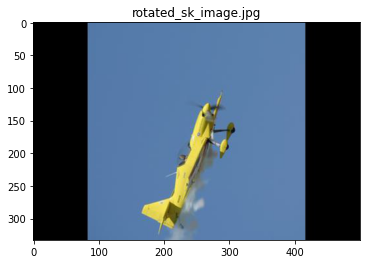

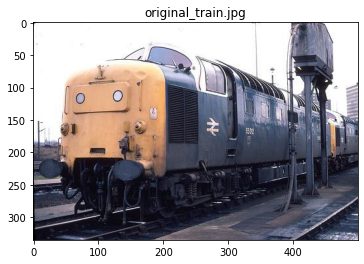

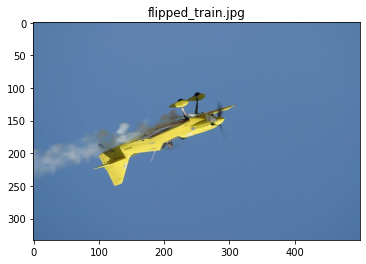

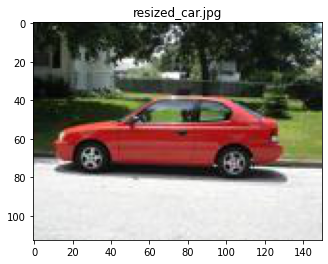

In [51]:
# Set up a figure of an appropriate size
fig = plt.figure(figsize=(12, 12))
# list files contained in image_folder (using os.listdir)
folder=os.path.join('./',image_folder)
file_names = os.listdir(folder)
img_num = 0
v=511
for file_name in file_names:
    file_path = os.path.join(folder,file_name)
    # Open the file using the matplotlib.image library (using imread (mp_image, matplotlib image))
    image = Image.open(file_path)
    # Add the image to the figure (which will have 1 row, a column for each filename, and a position based on its index in the file_names list)
    fig,a=plt.subplots()
    # Add the image to the plot
    image_plot =a.imshow(image)
    # Add a caption with the file name
    a.set_title(file_name)
        
# Show the plot
plt.show()